In [0]:
import torch
import numpy as np
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision

In [5]:
CIFAR_train = torchvision.datasets.CIFAR10('/', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('/', download=True, train=False)

0it [00:00, ?it/s]

170500096it [00:07, 21655169.64it/s]                               


Extracting /cifar-10-python.tar.gz to /
Files already downloaded and verified


In [0]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)

X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [7]:
len(y_train), len(y_test)

(50000, 10000)

In [8]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [0]:
X_train /= 255.
X_test /= 255.

In [10]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

frog truck truck deer automobile automobile bird horse ship cat 

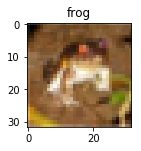

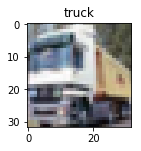

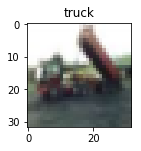

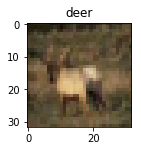

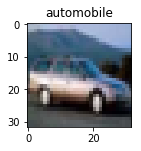

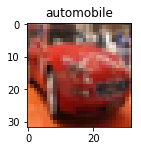

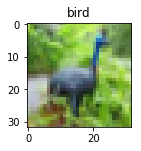

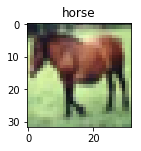

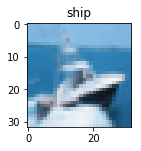

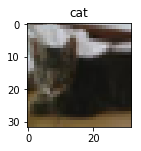

In [11]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.figure(figsize=(22, 20))
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i])
  plt.title(CIFAR_train.classes[y_train[i]])
  print(CIFAR_train.classes[y_train[i]], end=' ')

In [12]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [0]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [14]:
X_train.shape, y_train.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self,
               activation='tanh',
               pooling='avg',
               conv_size=5,
               use_batch_norm=False):
    super().__init__()
    
    self.conv_size = conv_size
    self.use_batch_norm = use_batch_norm
    
    if activation == 'tanh':
      activ_func = torch.nn.Tanh()
    elif activation == 'relu':
      activ_func = torch.nn.ReLU()
    else:
      raise 'Take a dick'
      
    if pooling == 'avg':
      pool_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    elif pooling == 'max':
      pool_layer = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    else:
      raise 'Take a new dick'
      
    if conv_size == 5:
      self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=6,
                                   kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv1_1 = torch.nn.Conv2d(in_channels=3, out_channels=6,
                                     kernel_size=3, padding=0)
      self.conv1_2 = torch.nn.Conv2d(in_channels=6, out_channels=6,
                                     kernel_size=3, padding=0)
    else:
      raise "May be u wana tis? (it's dick)"
      
    self.act1 = activ_func
    self.bn1 = torch.nn.BatchNorm2d(num_features=6)
    self.pool1 = pool_layer
    
    if conv_size == 5:
      self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16,
                                  kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv2_1 = torch.nn.Conv2d(in_channels=6, out_channels=16,
                                     kernel_size=3, padding=0)
      self.conv2_2 = torch.nn.Conv2d(in_channels=16, out_channels=16,
                                     kernel_size=3, padding=0)
    else:
      raise 'Soooo ... it is for you! (it is dick)'
      
    self.act2 = activ_func
    self.bn2 = torch.nn.BatchNorm2d(num_features=16)
    self.pool2 = pool_layer
    
    if conv_size == 5:
      self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=120,
                                   kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv3_1 = torch.nn.Conv2d(in_channels=16, out_channels=120,
                                     kernel_size=3, padding=0)
      self.conv3_2 = torch.nn.Conv2d(in_channels=120, out_channels=120,
                                     kernel_size=3, padding=0)
    else:
      raise 'Somebody says, that it is your'
      
    self.act3 = activ_func
    self.bn3 = torch.nn.BatchNorm2d(num_features=120)
    
    self.fc1 = torch.nn.Linear(120, 84)
    self.act4 = activ_func
    
    self.fc2 = torch.nn.Linear(84, 10)
    
    self.sm = torch.nn.Softmax()
    
  def forward(self, x):
    if self.conv_size == 5:
      x = self.conv1(x)
    elif self.conv_size == 3:
      x = self.conv1_2(self.conv1_1(x))
    
    x = self.act1(x)
    
    if self.use_batch_norm:
      x = self.bn1(x)
    
    x = self.pool1(x)
    
    if self.conv_size == 5:
      x = self.conv2(x)
    elif self.conv_size == 3:
      x = self.conv2_2(self.conv2_1(x))
    
    x = self.act2(x)
    
    if self.use_batch_norm:
      x = self.bn2(x)
    
    x = self.pool2(x)
    
    if self.conv_size == 5:
      x = self.conv3(x)
    elif self.conv_size == 3:
      x = self.conv3_2(self.conv3_1(x))
      
    x = self.act3(x)
    
    if self.use_batch_norm:
      x = self.bn3(x)
          
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    
    x = self.fc1(x)
    x = self.act4(x)
    x = self.fc2(x)
    
    return x
  
  def prediction(self, x):
    x = self.forward(x)
    x = self.sm(x)
    
    return x
    
    

In [0]:
def train(net, X_train, y_trian, X_test, y_test):
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net = net.to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
  
  batch_size = 100
  
  test_accuracy_history = []
  test_loss_history = []
  
  X_test = X_test.to(device)
  y_test = y_test.to(device)
  
  for epoch in range(30):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
      optimizer.zero_grad()
      net.train()
      
      batch_indices = order[start_index: start_index+batch_size]
      
      X_batch = X_train[batch_indices].to(device)
      y_batch = y_trian[batch_indices].to(device)
      
      y_pred = net.forward(X_batch)
      
      loss_value = loss(y_pred, y_batch)
      loss_value.backward()
      
      optimizer.step()
      
    net.eval()
    
    test_preds = net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)
  
  print('-----so... training is over----')
  del net
  return test_accuracy_history, test_loss_history

In [0]:
accuracies = {}
losses = {}


In [18]:

accuracies['tanh'], losses['tanh'] = train(LeNet5(activation='tanh', 
                                                  conv_size=5),
                                           X_train, y_train, 
                                           X_test, y_test)

# accuracies['relu'], losses['relu'] = train(LeNet5(activation='relu',
#                                                   conv_size=5),
#                                            X_train, y_train,
#                                            X_test, y_test)

# accuracies['relu_3'], losses['relu_3'] = train(LeNet5(activation='relu',
#                                                      conv_size=3),
#                                               X_train, y_train,
#                                               X_test, y_test)

# accuracies['relu_3_max'], losses['relu_3_max'] = train(LeNet5(activation='relu',
#                                                               conv_size=3,
#                                                               pooling='max'),
#                                                        X_train, y_train,
#                                                        X_test, y_test)

accuracies['relu_3_max_bn'], losses['relu_3_max_bn'] = train(LeNet5(activation='relu',
                                                                    conv_size=3,
                                                                    pooling='max',
                                                                    use_batch_norm=True),
                                                             X_train, y_train,
                                                             X_test, y_test)

tensor(0.3876)
tensor(0.4333)
tensor(0.4709)
tensor(0.4961)
tensor(0.4967)
tensor(0.5179)
tensor(0.5272)
tensor(0.5360)
tensor(0.5430)
tensor(0.5406)
tensor(0.5456)
tensor(0.5456)
tensor(0.5425)
tensor(0.5529)
tensor(0.5570)
tensor(0.5595)
tensor(0.5546)
tensor(0.5528)
tensor(0.5551)
tensor(0.5524)
tensor(0.5539)
tensor(0.5515)
tensor(0.5441)
tensor(0.5498)
tensor(0.5465)
tensor(0.5474)
tensor(0.5432)
tensor(0.5438)
tensor(0.5412)
tensor(0.5396)
-----so... training is over----
tensor(0.5591)
tensor(0.6031)
tensor(0.6389)
tensor(0.6396)
tensor(0.6545)
tensor(0.6599)
tensor(0.6581)
tensor(0.6722)
tensor(0.6840)
tensor(0.6688)
tensor(0.6729)
tensor(0.6824)
tensor(0.6865)
tensor(0.6751)
tensor(0.6830)
tensor(0.6782)
tensor(0.6864)
tensor(0.6794)
tensor(0.6767)
tensor(0.6819)
tensor(0.6740)
tensor(0.6619)
tensor(0.6709)
tensor(0.6742)
tensor(0.6735)
tensor(0.6771)
tensor(0.6694)
tensor(0.6659)
tensor(0.6712)
tensor(0.6742)
-----so... training is over----


Text(0.5, 1.0, 'Val Accuracy')

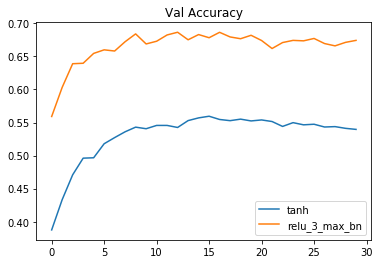

In [19]:
for experiment_id in accuracies.keys():
  plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Val Accuracy')

Text(0.5, 1.0, 'Val Loss')

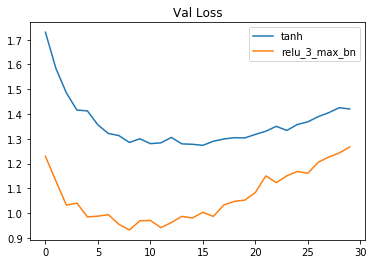

In [20]:
for experiment_id in losses.keys():
  plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Val Loss')

In [0]:
class CIFARNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.batch_norm0 = torch.nn.BatchNorm2d(3)
    
    self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
    self.act1 = torch.nn.ReLU()
    self.batch_norm1 = torch.nn.BatchNorm2d(16)
    self.pool1 = torch.nn.MaxPool2d(2, 2)
    
    self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
    self.act2 = torch.nn.ReLU()
    self.batch_norm2 = torch.nn.BatchNorm2d(32)
    self.pool2 = torch.nn.MaxPool2d(2, 2)
    
    self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
    self.act3 = torch.nn.ReLU()
    self.batch_norm3 = torch.nn.BatchNorm2d(64)
    
    self.fc1 = torch.nn.Linear(64 * 8 * 8, 256)
    self.act4 = torch.nn.Tanh()
    self.batch_norm4 = torch.nn.BatchNorm1d(256)
    
    self.fc2 = torch.nn.Linear(256, 64)
    self.act5 = torch.nn.Tanh()
    self.batch_norm5 = torch.nn.BatchNorm1d(64)
    
    self.fc3 = torch.nn.Linear(64, 10)
    
  def forward(self, x):
    x = self.batch_norm0(x)
    
    x = self.conv1(x)
    x = self.act1(x)
    x = self.batch_norm1(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.act2(x)
    x = self.batch_norm2(x)
    x = self.pool2(x)
    
    x = self.conv3(x)
    x = self.act3(x)
    x = self.batch_norm3(x)
    
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    
    x = self.fc1(x)
    x = self.act4(x)
    x = self.batch_norm4(x)
    
    x = self.fc2(x)
    x = self.act5(x)
    x = self.batch_norm5(x)
    
    x = self.fc3(x)
    
    return x 
    

In [22]:
accuracies['cifar_net'], losses['cifar_net'] = train(CIFARNet(), 
                                                     X_train, y_train,
                                                     X_test, y_test)

tensor(0.6617)
tensor(0.7072)
tensor(0.7109)
tensor(0.7226)
tensor(0.7230)
tensor(0.7208)
tensor(0.7192)
tensor(0.7147)
tensor(0.7204)
tensor(0.7176)
tensor(0.7144)
tensor(0.7125)
tensor(0.7093)
tensor(0.7211)
tensor(0.7253)
tensor(0.7204)
tensor(0.7206)
tensor(0.7191)
tensor(0.7198)
tensor(0.7171)
tensor(0.7227)
tensor(0.7178)
tensor(0.7202)
tensor(0.7227)
tensor(0.7136)
tensor(0.7178)
tensor(0.7109)
tensor(0.7144)
tensor(0.7198)
tensor(0.7247)
-----so... training is over----


Text(0.5, 1.0, 'Val Accuracy')

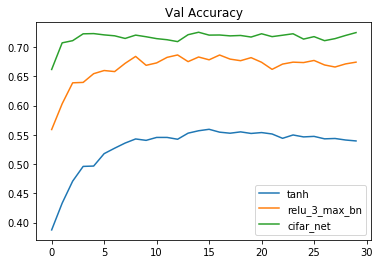

In [23]:
for experiment_id in accuracies.keys():
  plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Val Accuracy')

Text(0.5, 1.0, 'Val Loss')

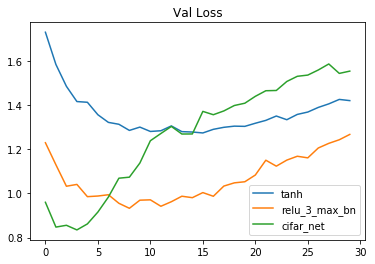

In [24]:
for experiment_id in losses.keys():
  plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Val Loss')

In [25]:
resnet18 = torchvision.models.resnet18()

accuracies['resnet18'], losses['resnet18'] = train(resnet18, 
                                                   X_train, y_train, 
                                                   X_test, y_test)

tensor(0.4519)
tensor(0.6189)
tensor(0.6122)
tensor(0.6995)
tensor(0.6961)
tensor(0.7286)
tensor(0.7402)
tensor(0.6635)
tensor(0.7400)
tensor(0.7230)
tensor(0.7471)
tensor(0.7393)
tensor(0.7483)
tensor(0.7506)
tensor(0.7210)
tensor(0.7342)
tensor(0.7552)
tensor(0.7358)
tensor(0.7468)
tensor(0.7496)
tensor(0.7402)
tensor(0.7534)
tensor(0.7491)
tensor(0.7461)
tensor(0.7442)
tensor(0.7580)
tensor(0.7413)
tensor(0.7478)
tensor(0.7448)
tensor(0.7520)
-----so... training is over----


Text(0.5, 1.0, 'val accuracy')

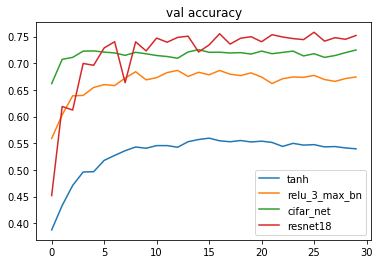

In [26]:
for experiment_id in accuracies.keys():
  plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('val accuracy')

Text(0.5, 1.0, 'val loss')

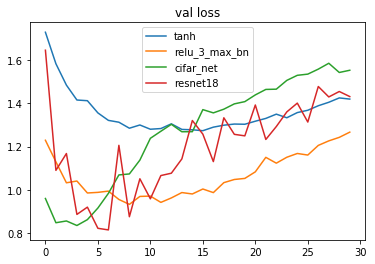

In [27]:
for experiment_id in losses.keys():
  plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('val loss')